In [79]:
### Step 1
### Importing Libraries

import warnings
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')
from io import StringIO
import requests

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa import statespace

### Step 2

Importing the dataset

In [3]:
sales_data = pd.read_csv("Dataset/Tractor-Sales.csv")

In [4]:
sales_data

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


### Step 3

**Data Prepaparion**
   - Make sure that the data has a continious Time Period in the same format
   - Missing Value Treatment
   - Outlier Treatment
   - Making the data indexed with Time (Making it to be Time Series data)
   - Optional: train-test split

In [9]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

In [10]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
sales_data.set_index(dates, inplace=True)

In [12]:
### Removing the original Month-Year variable
del sales_data['Month-Year']

In [13]:
sales_data

,Number of Tractor Sold
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203
...,...
2014-08-01,848
2014-09-01,640
2014-10-01,581
2014-11-01,519


In [14]:
### Renaming the Y variable
sales_data.columns = ['Tractor-Sales']

#### Converting it to a Series
sales_ts = sales_data['Tractor-Sales']

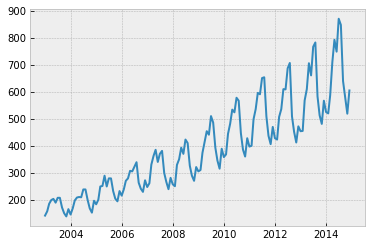

In [16]:
plt.plot(sales_ts)
plt.show()

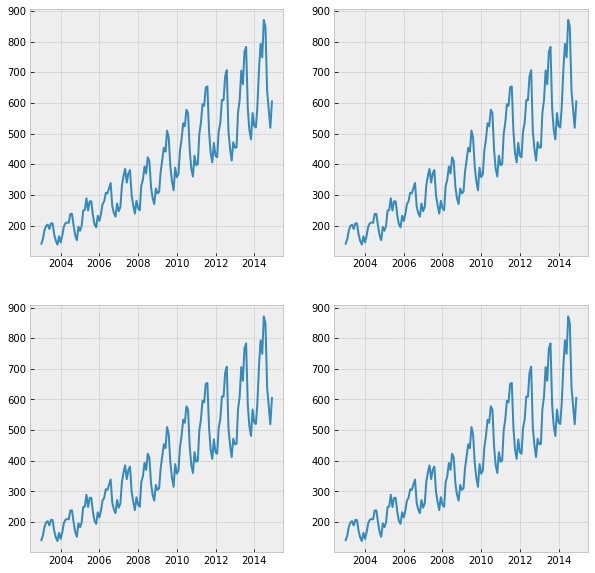

In [26]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)

# From this point forward your plt will be replace by axes[][]
axes[0][0].plot(sales_ts)


axes[0][1].plot(sales_ts)


axes[1][0].plot(sales_ts)


axes[1][1].plot(sales_ts)

plt.show()

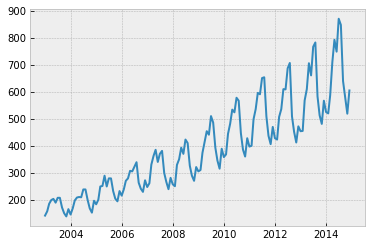

In [27]:
plt.plot(sales_ts)
plt.show()

In [28]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

In [29]:
adfuller(sales_ts)

(1.1088250591467375,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [30]:
# Perform Dickey-Fuller test (Making the output more readable)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [31]:
np.log(sales_ts)

2003-01-01    4.948760
2003-02-01    5.056246
2003-03-01    5.220356
2003-04-01    5.293305
2003-05-01    5.313206
                ...   
2014-08-01    6.742881
2014-09-01    6.461468
2014-10-01    6.364751
2014-11-01    6.251904
2014-12-01    6.405228
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: float64

In [32]:
# Perform Dickey-Fuller test (Making the output more readable)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(np.log(sales_ts))
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.732472
p-value                          0.414464
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
np.log10(sales_ts)

2003-01-01    2.149219
2003-02-01    2.195900
2003-03-01    2.267172
2003-04-01    2.298853
2003-05-01    2.307496
                ...   
2014-08-01    2.928396
2014-09-01    2.806180
2014-10-01    2.764176
2014-11-01    2.715167
2014-12-01    2.781755
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: float64

In [34]:
# Perform Dickey-Fuller test (Making the output more readable)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(np.log10(sales_ts))
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.732472
p-value                          0.414464
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [36]:
sales_ts_d1 = sales_ts.diff(1)

In [38]:
sales_ts_d1.dropna(inplace=True)

In [39]:
sales_ts_d1

2003-02-01     16.0
2003-03-01     28.0
2003-04-01     14.0
2003-05-01      4.0
2003-06-01    -14.0
              ...  
2014-08-01    -23.0
2014-09-01   -208.0
2014-10-01    -59.0
2014-11-01    -62.0
2014-12-01     86.0
Freq: MS, Name: Tractor-Sales, Length: 143, dtype: float64

In [40]:
# Perform Dickey-Fuller test (Making the output more readable)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_d1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.543481
p-value                          0.105250
#lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [42]:
sales_ts_d2 = sales_ts.diff(2)

In [44]:
sales_ts_d2.dropna(inplace=True)

2003-03-01     44.0
2003-04-01     42.0
2003-05-01     18.0
2003-06-01    -10.0
2003-07-01      4.0
              ...  
2014-08-01     99.0
2014-09-01   -231.0
2014-10-01   -267.0
2014-11-01   -121.0
2014-12-01     24.0
Freq: MS, Name: Tractor-Sales, Length: 142, dtype: float64

In [45]:
# Perform Dickey-Fuller test (Making the output more readable)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_d2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.704359
p-value                          0.073287
#lags Used                      13.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [52]:
sales_ts_log = np.log10(sales_ts)

In [56]:
sales_ts_log_d2 = sales_ts_log.diff(2)

In [57]:
sales_ts_log_d2.dropna(inplace=True)

In [59]:
# Perform Dickey-Fuller test (Making the output more readable)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log_d2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.200722
p-value                          0.019943
#lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [60]:
sales_ts_log_d1 = sales_ts_log.diff(1)

sales_ts_log_d1.dropna(inplace=True)

# Perform Dickey-Fuller test (Making the output more readable)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log_d1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.680467
p-value                          0.077480
#lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [61]:
sales_ts_d3 = sales_ts.diff(3)

In [63]:
sales_ts_d3.dropna(inplace=True)

In [64]:
# Perform Dickey-Fuller test (Making the output more readable)
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_d3)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.936724
p-value                          0.041241
#lags Used                      10.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


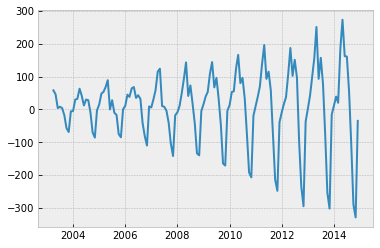

In [65]:
plt.plot(sales_ts_d3)
plt.show()

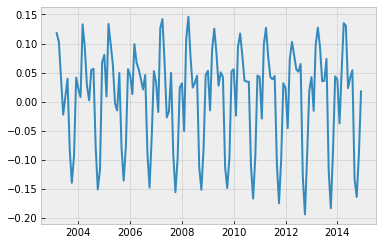

In [66]:
plt.plot(sales_ts_log_d2)
plt.show()

In [ ]:
## d = 2 with log(y) OR 3 without log(y)

C:\Users\Archish\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


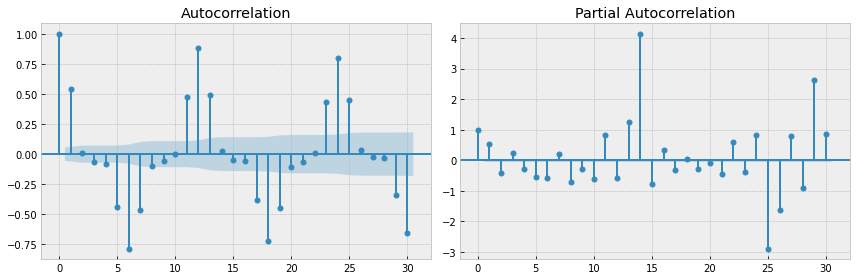

In [70]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_d2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_d2, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [ ]:
# p = 1
# q = 1

In [ ]:
# p = 1, d=2, q=1 when log(y)

In [72]:
# initiate and fit model
model = ARIMA(sales_ts_log, order=(1,2,1))
model_fit = model.fit()

C:\Users\Archish\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Tractor-Sales   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 205.343
Date:                Sat, 18 Dec 2021   AIC                           -404.686
Time:                        16:43:39   BIC                           -395.818
Sample:                    01-01-2003   HQIC                          -401.082
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1345      0.117      1.150      0.250      -0.095       0.364
ma.L1         -0.9999     14.724     -0.068      0.946     -29.858      27.858
sigma2         0.0031      0.046      0.068      0.946      -0.088       0.094
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.98   Prob(JB):                         0.42
Heteroskedasticity (H):               1.15   Skew:                            -0.14
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
model = sm.tsa.statespace.SARIMAX(sales_ts_log, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

results = model.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 341.647
Date:                            Sat, 18 Dec 2021   AIC                           -673.293
Time:                                    16:46:18   BIC                           -659.033
Sample:                                01-01-2003   HQIC                          -667.499
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3568      0.073     -4.890      0.000      -0.500      -0.214
ma.L1         -1.0000    776.640   

C:\Users\Archish\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]  # The value of 12 you might to have to chnage
# depending on your data. So if the data is quaterly, then the value will be 4, bi-yearly- 2 and so no

import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 2, 1)x(1, 0, 1, 12)12 model - AIC:-673.2933429897091


In [81]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(1, 2, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [85]:
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.05)

In [86]:
pred_ci_99 = pred_uc_99.conf_int()

In [88]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [91]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,564.642360,524.804990,607.503741,524.804990,607.503741
2015-01-01,562.716747,515.631344,614.101802,515.631344,614.101802
2015-02-01,668.759472,602.318744,742.529160,602.318744,742.529160
2015-03-01,756.662280,672.369251,851.522888,672.369251,851.522888
2015-04-01,854.604913,749.736385,974.141807,749.736385,974.141807


In [94]:
fc_all

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,564.642360,524.804990,607.503741,524.804990,607.503741
2015-01-01,562.716747,515.631344,614.101802,515.631344,614.101802
2015-02-01,668.759472,602.318744,742.529160,602.318744,742.529160
2015-03-01,756.662280,672.369251,851.522888,672.369251,851.522888
2015-04-01,854.604913,749.736385,974.141807,749.736385,974.141807
2015-05-01,815.153938,706.808966,940.106838,706.808966,940.106838
2015-06-01,937.513829,803.969436,1093.240787,803.969436,1093.240787
2015-07-01,932.919571,791.698499,1099.331281,791.698499,1099.331281
2015-08-01,698.775447,587.090456,831.706802,587.090456,831.706802
2015-09-01,620.925199,516.687117,746.192600,516.687117,746.192600


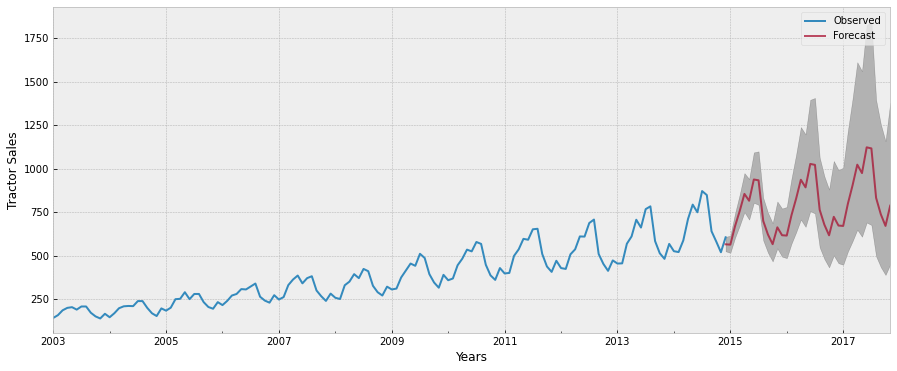

In [95]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
# axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

In [96]:
### Importing the data

mkt_sales_data = pd.read_csv('dataset/sales-and-marketing.csv')

In [99]:
### Making the data time indexed

# since the complete date was not mentioned, we assume that it was the first of every month
mkt_sales_data.set_index(pd.date_range(start='2011-01-01', freq='MS', periods=len(mkt_sales_data)), inplace=True)
mkt_sales_data.drop(['Time Period'], axis=1, inplace=True)
mkt_sales_data.rename(columns={'Sales':'Tractor-Sales'}, inplace=True)
mkt_sales_data.head(5)

,Tractor-Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


In [100]:
### Doing a differencing of 1
mkt_sales_data_diff = mkt_sales_data.diff(periods=1)
mkt_sales_data_diff.dropna(inplace=True)

# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(mkt_sales_data_diff['Tractor-Sales'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.015650e+00
p-value                        6.743731e-10
#lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


In [105]:
mkt_sales_data['Mkt_Exp_Lag_1'] = mkt_sales_data['Marketing Expense'].shift(1)
mkt_sales_data['Mkt_Exp_Lag_2'] = mkt_sales_data['Marketing Expense'].shift(2)
mkt_sales_data['Mkt_Exp_Lag_3'] = mkt_sales_data['Marketing Expense'].shift(3)
mkt_sales_data['Mkt_Exp_Lag_4'] = mkt_sales_data['Marketing Expense'].shift(4)

In [107]:
mkt_sales_data.dropna(inplace=True)
mkt_sales_data.head()

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
2011-05-01,596,744.15,565.16,437.09,501.80,486.64
2011-06-01,591,548.74,744.15,565.16,437.09,501.80
2011-07-01,651,650.21,548.74,744.15,565.16,437.09
2011-08-01,654,777.51,650.21,548.74,744.15,565.16
2011-09-01,509,547.11,777.51,650.21,548.74,744.15


In [111]:
mkt_sales_data.corr().head(1)

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
Tractor-Sales,1.0,0.807838,0.585169,0.262011,-0.056909,-0.257012


In [112]:
import sys

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]  # The value of 12 you might to have to chnage
# depending on your data. So if the data is quaterly, then the value will be 4, bi-yearly- 2 and so no
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
                
                

    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [114]:
timeseries = mkt_sales_data["Tractor-Sales"]

In [115]:
regressors = mkt_sales_data[["Marketing Expense", "Mkt_Exp_Lag_1", "Mkt_Exp_Lag_2"]]

In [118]:
best_results = auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 2), q=range(0, 2),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:273.4843871799599
                                     SARIMAX Results                                      
Dep. Variable:                      Tractor-Sales   No. Observations:                   44
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -129.742
Date:                            Sat, 18 Dec 2021   AIC                            273.484
Time:                                    17:04:41   BIC                            283.055
Sample:                                05-01-2011   HQIC                           276.482
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Marketing Expense     0.0287    

In [119]:
best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                      exog = regressors,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()
print(best_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Tractor-Sales   No. Observations:                   44
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -129.742
Date:                            Sat, 18 Dec 2021   AIC                            273.484
Time:                                    17:05:55   BIC                            283.055
Sample:                                05-01-2011   HQIC                           276.482
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Marketing Expense     0.0287      0.045      0.640      0.522      -0.059       0.117
Mkt_Exp_Lag_1 

In [120]:
Future_mkt_spend = {
    '2015-01-01' : [600, 559.75, 527.60],
    '2015-02-01' : [550, 600, 559.75],
    '2015-03-01' : [700, 550, 600],
    '2015-04-01' : [590, 700, 550],
    '2015-05-01' : [480, 590, 700],
    '2015-06-01' : [520, 480, 590],
    '2015-07-01' : [800, 520, 480],
    '2015-08-01' : [675, 800, 520],
    '2015-09-01' : [820, 675, 800],
    '2015-10-01' : [710, 820, 675],
    '2015-11-01' : [550, 710, 820],
    '2015-12-01' : [590, 550, 710]
}

Future_mkt_spend = pd.DataFrame(Future_mkt_spend).T

Future_mkt_spend.columns = ['Marketing Expense', 'Mkt_Exp_Lag_1', 'Mkt_Exp_Lag_2']

Future_mkt_spend

,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2
2015-01-01,600.0,559.75,527.60
2015-02-01,550.0,600.00,559.75
2015-03-01,700.0,550.00,600.00
2015-04-01,590.0,700.00,550.00
2015-05-01,480.0,590.00,700.00
2015-06-01,520.0,480.00,590.00
2015-07-01,800.0,520.00,480.00
2015-08-01,675.0,800.00,520.00
2015-09-01,820.0,675.00,800.00
2015-10-01,710.0,820.00,675.00


In [122]:
#Forecast for next 12 Months
Forecasting12_SARIMAX = best_results.forecast(steps=12, exog=Future_mkt_spend)

In [123]:
Forecasting12_SARIMAX

2015-01-01    575.015983
2015-02-01    563.538503
2015-03-01    662.663282
2015-04-01    761.803995
2015-05-01    859.052036
2015-06-01    818.001314
2015-07-01    965.096830
2015-08-01    951.381353
2015-09-01    713.073510
2015-10-01    636.332919
2015-11-01    567.941596
2015-12-01    665.188155
Freq: MS, Name: predicted_mean, dtype: float64

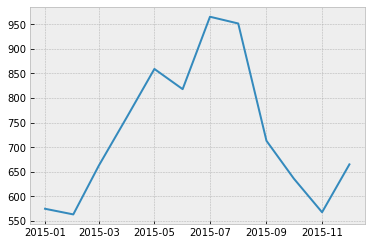

In [124]:
### Forecasting for the next 12 Time Period
plt.plot(Forecasting12_SARIMAX)
plt.show()

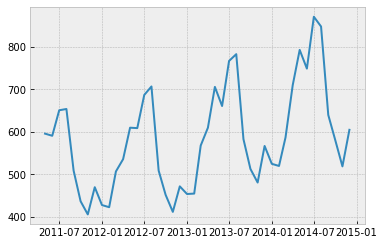

In [128]:
plt.plot(mkt_sales_data['Tractor-Sales'])